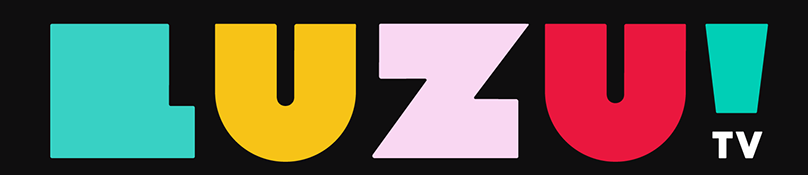

#**PROYECTO:** Análisis de datos públicos del canal de streaming **LUZU TV**

##**Objetivos del proyecto**

 **Objetivo general**

*   Desarrollar un proceso integral de análisis de datos sobre el canal de streaming LUZU TV, utilizando información pública obtenida desde la API de YouTube, con el fin de estructurar, analizar y visualizar métricas clave que permitan comprender el desempeño del contenido y generar insights orientados a la toma de decisiones estratégicas.

**Objetivo específico 1**

**ETL (Extract, Transform, Load)**

*   Extraer datos públicos de videos del canal LUZU TV mediante la YouTube Data API utilizando Python en Google Colab.
*   Diseñar un proceso de limpieza y transformación de datos que asegure calidad, consistencia y confiabilidad del dataset.


*   Normalizar textos y variables temporales para facilitar el análisis.
*   Clasificar los videos por programa y formato mediante reglas explícitas y enfoques iterativos.

*   Crear métricas derivadas (engagement, viralidad, eficiencia temporal, crecimiento) que aporten valor analítico.
*   Obtener un DataFrame final estructurado y listo para su análisis exploratorio y visualización.

###**ETL (Extract, Transform, Load)**

####**Extracción de datos vía YouTube Data API**

In [ ]:
!pip install google-api-python-client

In [ ]:
from googleapiclient.discovery import build
from google.colab import userdata
api_key = userdata.get("YOUTUBE_API_KEY")
youtube = build('youtube', 'v3', developerKey=api_key)

In [ ]:
# 1.a Búsqueda del ID del canal por video
request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id="_t35fwYcdjI"
    )
response_video = request.execute()

response_video

{'kind': 'youtube#videoListResponse',
 'etag': '41tSHqOgY1NgRMbvt3l0m3nGnlg',
 'items': [{'kind': 'youtube#video',
   'etag': 'ZTXfqlaqd-qjbn6DOxVELkhK5M0',
   'id': '_t35fwYcdjI',
   'snippet': {'publishedAt': '2025-12-03T15:56:56Z',
    'channelId': 'UCTHaNTsP7hsVgBxARZTuajw',
    'title': '#NADIEDICENADA | LALI: "LUZU ES MI CANAL": TODO SOBRE SU DOCUMENTAL Y ¡HACEMOS UN MOVISTAR ARENA!',
    'description': '▶️ Bienvenid@s a LUZU TV. Un medio de Stream. Sí, un medio. Sin vueltas.\n\n▶️ Si te gustó el video suscribite al canal para no perderte ningún contenido y verlo\ncuando quieras, donde quieras.\n\n▶️Seguinos en nuestras redes sociales:▶️ Bienvenid@s a LUZU TV. Un medio de Stream. Sí, un medio. Sin vueltas.\n\n▶️ Si te gustó el video suscribite al canal para no perderte ningún contenido y verlo\ncuando quieras, donde quieras.\n\n▶️Seguinos en nuestras redes sociales:\nINSTAGRAM: instagram.com/luzutv\n\nProgramación 2025:\n#FMLuzu | Lunes a Viernes de 7 a 8hs con Cris Vanadia.\n#An

In [ ]:
# Código que muestra el ID del canal
channel_id = response_video['items'][0]['snippet']['channelId']
channel_id

'UCTHaNTsP7hsVgBxARZTuajw'

In [ ]:
# 1.b Búsqueda del ID del canal con el método search list
request = youtube.search().list(
        part="snippet",
        maxResults=25,
        q="LUZU TV",
        type="channel"
    )
response_id = request.execute()
response_id

{'kind': 'youtube#searchListResponse',
 'etag': 'sAwu4OIY9md7l9UnmGlye9mMLAg',
 'nextPageToken': 'CBkQAA',
 'regionCode': 'US',
 'pageInfo': {'totalResults': 4696, 'resultsPerPage': 25},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'ZkYsuWjkHMaO3ZnHmO9O1Iu1LrE',
   'id': {'kind': 'youtube#channel', 'channelId': 'UCTHaNTsP7hsVgBxARZTuajw'},
   'snippet': {'publishedAt': '2013-05-07T03:12:19Z',
    'channelId': 'UCTHaNTsP7hsVgBxARZTuajw',
    'title': 'LUZU TV',
    'description': 'Estamos dónde hay que estar. Somos lo que queremos ser.',
    'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/1-K9ikW6iP0nnfCVhcCnH2MpGSWVUee1DUL4Y8-8i_xwa-JKAv-9GEs1OKAl8ddpXMaFxOyB=s88-c-k-c0xffffffff-no-rj-mo'},
     'medium': {'url': 'https://yt3.ggpht.com/1-K9ikW6iP0nnfCVhcCnH2MpGSWVUee1DUL4Y8-8i_xwa-JKAv-9GEs1OKAl8ddpXMaFxOyB=s240-c-k-c0xffffffff-no-rj-mo'},
     'high': {'url': 'https://yt3.ggpht.com/1-K9ikW6iP0nnfCVhcCnH2MpGSWVUee1DUL4Y8-8i_xwa-JKAv-9GEs1OKAl8ddpXMaFxOyB=s800-c-k-c0x

In [ ]:
# Código que muestra el ID del canal (a partir de search list)
channel_id = response_id['items'][0]['snippet']['channelId']
channel_id

'UCTHaNTsP7hsVgBxARZTuajw'

In [ ]:
# 2. Obtener información del canal
channel_id = 'UCTHaNTsP7hsVgBxARZTuajw'

request = youtube.channels().list(
    part="snippet,statistics,contentDetails",
    id=channel_id
)
response = request.execute()

channel_data = response['items'][0]
upload_playlist = channel_data['contentDetails']['relatedPlaylists']['uploads']

print('Nombre del canal:', channel_data['snippet']['title'])
print('Videos totales:', channel_data['statistics']['videoCount'])
print('Vistas:', channel_data['statistics']['viewCount'])
print('Suscriptores:', channel_data['statistics']['subscriberCount'])


Nombre del canal: LUZU TV
Videos totales: 9989
Vistas: 1025377543
Suscriptores: 2680000


In [ ]:
# 3. Obtener todos los videos de playlist del canal.
'''Se incluyen los videos de playlist ya que posteriormente se analizarán los
videos por programas y estos se organizan en listas de reproducción'''

videos = []
next_page = None

while True:
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=upload_playlist,
        maxResults=50,
        pageToken=next_page
    )
    response = request.execute()

    for item in response['items']:
        videos.append(item['contentDetails']['videoId'])

    next_page = response.get('nextPageToken')

    if not next_page:
        break

print('Videos encontrados:', len(videos))


Videos encontrados: 9914


In [ ]:
# 4. Obtener detalles de cada video
video_stats = []

for i in range(0, len(videos), 50): # Esto es porque la YouTube Data API solo permite obtener detalles de hasta 50 videos por request
    batch = videos[i:i+50]

    request = youtube.videos().list(
        part='snippet,statistics,contentDetails',
        id=','.join(batch)
    )
    response = request.execute()

    for video in response['items']:
        stats = {
            'Video_id': video['id'],
            'Title': video['snippet']['title'],
            'Published At': video['snippet']['publishedAt'],
            'Duration': video['contentDetails']['duration'],
            'Views': video['statistics'].get('viewCount'),
            'Likes': video['statistics'].get('likeCount'),
            'Comments': video['statistics'].get('commentCount')
        }
        video_stats.append(stats)

In [ ]:
# 5.Convertir a DataFrame
import pandas as pd
df = pd.DataFrame(video_stats)
df.head(5)


,Video_id,Title,Published At,Duration,Views,Likes,Comments
0,D6aaqdoTsB8,#LANOVELA l GRACIAS POR ESTE AÑO HERMOSO! LOS ...,2025-12-19T21:56:00Z,PT1H53M,68612,2861,113
1,Wat1Tu-Or3w,El NO discurso de Tati #losnotalentos #luzutv,2025-12-19T21:13:40Z,PT2M24S,27698,1034,5
2,rnZPViyAvLE,Juego de llamadas para la castro #luzutv #patr...,2025-12-19T21:13:30Z,PT1M32S,81508,1530,2
3,vxO8cXrefoE,La Castro descubre el pimentero #patriayfamili...,2025-12-19T21:13:20Z,PT37S,47905,797,3
4,ubsQjewAjJc,"#SEFUELARGA l NOS DESPEDIMOS DEL 2025, NOS REI...",2025-12-19T20:04:52Z,PT2H2M12S,167742,9205,139


####**Transformación de datos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Video_id      9914 non-null   object
 1   Title         9914 non-null   object
 2   Published At  9914 non-null   object
 3   Duration      9914 non-null   object
 4   Views         9906 non-null   object
 5   Likes         9914 non-null   object
 6   Comments      9910 non-null   object
dtypes: object(7)
memory usage: 542.3+ KB


In [ ]:
# Para simplificar el df se decide excluir del análisis las columnas de ids y redefinir el dataframe original con el resultado:
df.drop(['Video_id'], axis=1, inplace=True)
df.head(5)

,Title,Published At,Duration,Views,Likes,Comments
0,#LANOVELA l GRACIAS POR ESTE AÑO HERMOSO! LOS ...,2025-12-19T21:56:00Z,PT1H53M,68612,2861,113
1,El NO discurso de Tati #losnotalentos #luzutv,2025-12-19T21:13:40Z,PT2M24S,27698,1034,5
2,Juego de llamadas para la castro #luzutv #patr...,2025-12-19T21:13:30Z,PT1M32S,81508,1530,2
3,La Castro descubre el pimentero #patriayfamili...,2025-12-19T21:13:20Z,PT37S,47905,797,3
4,"#SEFUELARGA l NOS DESPEDIMOS DEL 2025, NOS REI...",2025-12-19T20:04:52Z,PT2H2M12S,167742,9205,139


#####**Primer limpieza**

1. Identificar duplicados

In [ ]:
df[df.duplicated()]

,Title,Published At,Duration,Views,Likes,Comments


2. Identificar columnas con valores nulos. ¿% de valores Nulls por columnas?

In [ ]:
# Columnas con valores nulos
df.isnull().sum()

,0
Title,0
Published At,0
Duration,0
Views,8
Likes,0
Comments,4


In [ ]:
# Porcentajes de Null por columnas
round(df.isnull().mean()*100,2)

,0
Title,0.00
Published At,0.00
Duration,0.00
Views,0.08
Likes,0.00
Comments,0.04


In [ ]:
# Identificación de las filas con valores Null
df[df.isnull().any(axis=1)]

,Title,Published At,Duration,Views,Likes,Comments
3647,🔴 EL AFTER PARTY DE NADIE DICE NADA,2025-03-01T02:45:51Z,PT18M50S,None,4059,59
3718,🔴 EL AFTER PARTY DE NADIE DICE NADA,2025-02-18T02:50:31Z,PT15M1S,None,547,7
3755,🔴 EL AFTER PARTY DE NADIE DICE NADA,2025-02-11T02:45:22Z,PT20M5S,None,1100,12
3801,🔴 EL AFTER PARTY DE NADIE DICE NADA,2025-02-04T02:44:02Z,PT19M40S,None,1903,24
3850,🔴 EL AFTER PARTY DE NADIE DICE NADA,2025-01-28T02:35:56Z,PT15M20S,None,1071,19
3893,🔴 EL AFTER PARTY DE NADIE DICE NADA,2025-01-21T02:53:15Z,PT37M51S,None,843,12
3932,🔴 EL AFTER PARTY DE NADIE DICE NADA,2025-01-14T02:42:01Z,PT18M35S,None,1752,13
3978,🔴 EL AFTER PARTY DE NADIE DICE NADA,2025-01-07T03:01:13Z,PT27M31S,None,5453,62
4268,#STREAMMASTER l ZAIRA NARA CONOCE A CHARLY?,2024-11-05T01:33:00Z,PT1H41M30S,10555,335,None
5139,#STREAMMASTER | EL PARCHE MAS ESPERADO Y LA CO...,2024-05-16T06:17:24Z,PT1H46M33S,18117,480,None


#####**Justificación para la eliminación de videos con valores faltantes en métricas clave**

Durante el proceso de exploración y limpieza del conjunto de datos obtenido mediante la YouTube Data API, se identificaron casos donde algunos videos presentaban valores nulos en métricas fundamentales como Views o Comments.

Estos valores faltantes no responden a un error en el proceso de extracción, sino a la propia naturaleza del contenido o a restricciones impuestas en la plataforma.

Los datos en cuestión no pudieron ser recuperados mediante imputación, ya que no existe una relación consistente entre estas métricas en contenido de streaming que permita estimarlas sin introducir sesgos. Además, los registros afectados representan una proporción mínima del dataset y su presencia podría distorsionar el análisis general.

Por estos motivos, se decidió eliminar los registros faltantes para preservar la calidad del conjunto de datos y garantizar la validez de las métricas obtenidas.

In [ ]:
# Eliminación de filas con registros faltantes
df = df.dropna(subset=["Views", "Comments"])
df

,Title,Published At,Duration,Views,Likes,Comments
0,#LANOVELA l GRACIAS POR ESTE AÑO HERMOSO! LOS ...,2025-12-19T21:56:00Z,PT1H53M,68612,2861,113
1,El NO discurso de Tati #losnotalentos #luzutv,2025-12-19T21:13:40Z,PT2M24S,27698,1034,5
2,Juego de llamadas para la castro #luzutv #patr...,2025-12-19T21:13:30Z,PT1M32S,81508,1530,2
3,La Castro descubre el pimentero #patriayfamili...,2025-12-19T21:13:20Z,PT37S,47905,797,3
4,"#SEFUELARGA l NOS DESPEDIMOS DEL 2025, NOS REI...",2025-12-19T20:04:52Z,PT2H2M12S,167742,9205,139
...,...,...,...,...,...,...
9909,EL POR QUÉ DE NADIE DICE NADA Y SUS MENSAJES B...,2020-11-03T01:36:41Z,PT5M25S,5642,232,8
9910,PINTÓ CHARLA DE DEPILACIÓN Y UNA CONFESIÓN DE ...,2020-11-03T00:23:18Z,PT7M32S,39905,679,21
9911,AMIGARSE CON EL ABURRIMIENTO | CON NICO APELT,2020-11-02T19:51:34Z,PT43M44S,11611,390,12
9912,APERTURA | PRIMER PROGRAMA #YETEADO Y EL CONCE...,2020-11-02T18:33:50Z,PT16M43S,139436,3963,299


In [ ]:
# Verificación de la eliminación de registros faltantes
df.isnull().sum()

,0
Title,0
Published At,0
Duration,0
Views,0
Likes,0
Comments,0


#####**Función de calidad de datos**

In [ ]:
# 1. Instalar la librería "isodate" para el parseo de la columna ['Duration']
!pip install isodate


In [ ]:
# 2. Función Calidad de datos
import isodate

def calidad_df(df):

    df = df.copy() # Se copia el df para evitar modificar el original

    # Normalización de títulos
    # Eliminación de tildes
    import unicodedata

    def quitar_tildes(texto):
      texto = unicodedata.normalize('NFD', texto)
      texto = ''.join(
        c for c in texto
        if unicodedata.category(c) != 'Mn'
    )
      return texto

    #Aplicación de la función quitar tildes y normalización del título original
    df["Title_norm"] = (
    df["Title"]
    .str.lower()
    .str.strip()
    .apply(quitar_tildes)
)

    # Conversión: vistas, likes, comentarios a tipos numéricos
    df['Views'] = pd.to_numeric(df['Views'], errors='coerce')
    df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
    df['Comments'] = pd.to_numeric(df['Comments'], errors='coerce')

    # Convertir duración a minutos
    df['Duration_min'] = round(df['Duration'].apply(
        lambda x: isodate.parse_duration(x).total_seconds() / 60
    ),2)

    # Eliminación de la columna 'Duration' (en formato ISO 8601)
    df = df.drop(columns='Duration')

    # Fechas
    df['Published At'] = pd.to_datetime(df['Published At'])

    return df


In [ ]:
# Verificación de la ejecución de la función anterior
df_luzu = calidad_df(df)
df_luzu.head(5)

,Title,Published At,Views,Likes,Comments,Title_norm,Duration_min
0,#LANOVELA l GRACIAS POR ESTE AÑO HERMOSO! LOS ...,2025-12-19 21:56:00+00:00,68612,2861,113,#lanovela l gracias por este ano hermoso! los ...,113.00
1,El NO discurso de Tati #losnotalentos #luzutv,2025-12-19 21:13:40+00:00,27698,1034,5,el no discurso de tati #losnotalentos #luzutv,2.40
2,Juego de llamadas para la castro #luzutv #patr...,2025-12-19 21:13:30+00:00,81508,1530,2,juego de llamadas para la castro #luzutv #patr...,1.53
3,La Castro descubre el pimentero #patriayfamili...,2025-12-19 21:13:20+00:00,47905,797,3,la castro descubre el pimentero #patriayfamili...,0.62
4,"#SEFUELARGA l NOS DESPEDIMOS DEL 2025, NOS REI...",2025-12-19 20:04:52+00:00,167742,9205,139,"#sefuelarga l nos despedimos del 2025, nos rei...",122.20


#####**NUEVAS MÉTRICAS**

In [ ]:
import numpy as np

# 1. Función Agregar métricas

def agregar_metricas(df):

    # 1.1 Días desde publicación
    '''Esta información permite normalizar las Views y comparar videos antiguos vs videos recientes'''
    now_utc = pd.Timestamp.now(tz="UTC")
    df['Days_since_published'] = (now_utc - df['Published At']).dt.days
    df['Days_since_published'] = df['Days_since_published'].replace(0, 1) # Evita dividir por 0 en la normalización

    # 1.2 Views por día (normalización temporal)
    df['Views_per_day'] = df['Views'] / df['Days_since_published']

    # 1.3 Views/minuto normalizado - VIRALIDAD
    df['Views_per_min_norm'] = df['Views_per_day'] / df['Duration_min'].replace(0, np.nan)

    # 1.4 Like ratio
    df['Like_ratio'] = df['Likes'] / df['Views']

    # 1.5 Comment ratio
    df['Comments_ratio'] = df['Comments'] / df['Views']

    # 1.6 ENGAGEMENT RATE
    df['Engagement_rate'] = (df['Likes'] + df['Comments']) / df['Views']

    # 1.7 Growth factor - VIRALIDAD
    df['Growth_factor'] = (df['Likes'] + df['Comments']) / np.log1p(df['Days_since_published'])

    # 1.8 Detección de outliers con IQR
    def detectar_outliers(col):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        limite_inf = q1 - 1.5 * iqr
        limite_sup = q3 + 1.5 * iqr
        return ~df[col].between(limite_inf, limite_sup)

    df['Outlier_views'] = detectar_outliers('Views')
    df['Outlier_likes'] = detectar_outliers('Likes')
    df['Outlier_engagement'] = detectar_outliers('Engagement_rate')

    return df


In [ ]:
# Verificación de la ejecución de la función anterior
df_luzu = agregar_metricas(df_luzu)
df_luzu.head(5)

,Title,Published At,Views,Likes,Comments,Title_norm,Duration_min,Days_since_published,Views_per_day,Views_per_min_norm,Like_ratio,Comments_ratio,Engagement_rate,Growth_factor,Outlier_views,Outlier_likes,Outlier_engagement
0,#LANOVELA l GRACIAS POR ESTE AÑO HERMOSO! LOS ...,2025-12-19 21:56:00+00:00,68612,2861,113,#lanovela l gracias por este ano hermoso! los ...,113.00,3,22870.666667,202.395280,0.041698,0.001647,0.043345,2145.287526,False,False,False
1,El NO discurso de Tati #losnotalentos #luzutv,2025-12-19 21:13:40+00:00,27698,1034,5,el no discurso de tati #losnotalentos #luzutv,2.40,3,9232.666667,3846.944444,0.037331,0.000181,0.037512,749.480074,False,False,False
2,Juego de llamadas para la castro #luzutv #patr...,2025-12-19 21:13:30+00:00,81508,1530,2,juego de llamadas para la castro #luzutv #patr...,1.53,3,27169.333333,17757.734205,0.018771,0.000025,0.018796,1105.104401,False,False,False
3,La Castro descubre el pimentero #patriayfamili...,2025-12-19 21:13:20+00:00,47905,797,3,la castro descubre el pimentero #patriayfamili...,0.62,3,15968.333333,25755.376344,0.016637,0.000063,0.016700,577.078016,False,False,False
4,"#SEFUELARGA l NOS DESPEDIMOS DEL 2025, NOS REI...",2025-12-19 20:04:52+00:00,167742,9205,139,"#sefuelarga l nos despedimos del 2025, nos rei...",122.20,3,55914.000000,457.561375,0.054876,0.000829,0.055705,6740.271231,False,True,False


#####**Variables categóricas**

- Programas

In [ ]:
programas = {
    'nadiedicenada':'Nadie dice nada',
    'antesquenadie':'Antes que nadie',
    'patriayfamilia':'Patria y familia',
    'sefuelarga':'Se fue larga',
    'lanovela':'La novela',
    'algovaapicar':'Algo va a picar',
    'losnotalentos':'Los no talentos',
    'edicionespecial':'Edición especial',
    'algodemusica':'Algo de música',
    'xtreammaster': 'Xtream master',
    'fmluzu':'FM Luzu',
    'mananasnostalgicas':'Mañanas nostálgicas',
    'pasionporlaredonda':'Pasión por la redonda',
    'luzufc':'Luzu FC',
    'nadaquenosepamos':'Nada que no sepamos',
    'asisomos':'Así somos',
    'plp':'PLP',
    'abueluzu':'Abueluzu',
    'luzukids':'Luzu kids',
    'fernecongrego':'Ferné con Grego',
    'entrenosotros':'Entre nosotros',
    'tardedetertulia':'Tarde de tertulia',
    'masdelomismo':'Más de lo mismo',
    'redflag':'Red flag',
    'frescoybatata':'Fresco y Batata',
    'elpase': '#elpase',
    'duquesas':'Duquesas',
    'ndn':'El reality de Nadie dice nada'
}

In [ ]:
# Función para detectar programas
def detectar_programa(title):
    for tag, nombre in programas.items():
        if f'#{tag}' in title:
            return nombre
    return 'Contenido no programático'


In [ ]:
# Aplicación de la función Detectar programa en la nueva columna
df_luzu['Programs'] = df_luzu['Title_norm'].apply(detectar_programa)
df_luzu['Programs']

,Programs
0,La novela
1,Los no talentos
2,Patria y familia
3,Patria y familia
4,Se fue larga
...,...
9909,Contenido no programático
9910,Contenido no programático
9911,Contenido no programático
9912,Nadie dice nada


In [ ]:
# Verificación de la detección de programas
df_luzu['Programs'].unique()

array(['La novela', 'Los no talentos', 'Patria y familia', 'Se fue larga',
       'Nadie dice nada', 'Antes que nadie', 'Algo va a picar',
       'Edición especial', 'Contenido no programático', 'Luzu kids',
       'Algo de música', 'Xtream master', 'PLP', 'Así somos', 'FM Luzu',
       'El reality de Nadie dice nada', 'Luzu FC', 'Mañanas nostálgicas',
       'Nada que no sepamos', 'Tarde de tertulia', 'Duquesas',
       'Fresco y Batata', 'Entre nosotros', 'Pasión por la redonda',
       'Más de lo mismo', 'Red flag', 'Abueluzu', 'Ferné con Grego',
       '#elpase'], dtype=object)

- Formato del video

In [ ]:
# Función para clasificar formato
def clasificar_formato(duration):
    if duration <= 1:
        return 'Short'
    elif duration <= 10:
        return 'Clip'
    elif duration <= 30:
        return 'Segmento'
    elif duration <= 180 :
        return 'Full program'
    else:
        return 'Complete programming'


In [ ]:
# Aplicación de la función Detectar programa en la nueva columna
df_luzu['Video_format'] = df_luzu['Duration_min'].apply(clasificar_formato)
df_luzu['Video_format']

,Video_format
0,Full program
1,Clip
2,Clip
3,Short
4,Full program
...,...
9909,Clip
9910,Clip
9911,Full program
9912,Segmento


In [ ]:
df_luzu

,Title,Published At,Views,Likes,Comments,Title_norm,Duration_min,Days_since_published,Views_per_day,Views_per_min_norm,Like_ratio,Comments_ratio,Engagement_rate,Growth_factor,Outlier_views,Outlier_likes,Outlier_engagement,Programs,Video_format
0,#LANOVELA l GRACIAS POR ESTE AÑO HERMOSO! LOS ...,2025-12-19 21:56:00+00:00,68612,2861,113,#lanovela l gracias por este ano hermoso! los ...,113.00,3,22870.666667,202.395280,0.041698,0.001647,0.043345,2145.287526,False,False,False,La novela,Full program
1,El NO discurso de Tati #losnotalentos #luzutv,2025-12-19 21:13:40+00:00,27698,1034,5,el no discurso de tati #losnotalentos #luzutv,2.40,3,9232.666667,3846.944444,0.037331,0.000181,0.037512,749.480074,False,False,False,Los no talentos,Clip
2,Juego de llamadas para la castro #luzutv #patr...,2025-12-19 21:13:30+00:00,81508,1530,2,juego de llamadas para la castro #luzutv #patr...,1.53,3,27169.333333,17757.734205,0.018771,0.000025,0.018796,1105.104401,False,False,False,Patria y familia,Clip
3,La Castro descubre el pimentero #patriayfamili...,2025-12-19 21:13:20+00:00,47905,797,3,la castro descubre el pimentero #patriayfamili...,0.62,3,15968.333333,25755.376344,0.016637,0.000063,0.016700,577.078016,False,False,False,Patria y familia,Short
4,"#SEFUELARGA l NOS DESPEDIMOS DEL 2025, NOS REI...",2025-12-19 20:04:52+00:00,167742,9205,139,"#sefuelarga l nos despedimos del 2025, nos rei...",122.20,3,55914.000000,457.561375,0.054876,0.000829,0.055705,6740.271231,False,True,False,Se fue larga,Full program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,EL POR QUÉ DE NADIE DICE NADA Y SUS MENSAJES B...,2020-11-03 01:36:41+00:00,5642,232,8,el por que de nadie dice nada y sus mensajes b...,5.42,1876,3.007463,0.554882,0.041120,0.001418,0.042538,31.841092,False,False,False,Contenido no programático,Clip
9910,PINTÓ CHARLA DE DEPILACIÓN Y UNA CONFESIÓN DE ...,2020-11-03 00:23:18+00:00,39905,679,21,pinto charla de depilacion y una confesion de ...,7.53,1876,21.271322,2.824877,0.017015,0.000526,0.017542,92.869850,False,False,False,Contenido no programático,Clip
9911,AMIGARSE CON EL ABURRIMIENTO | CON NICO APELT,2020-11-02 19:51:34+00:00,11611,390,12,amigarse con el aburrimiento | con nico apelt,43.73,1876,6.189232,0.141533,0.033589,0.001034,0.034622,53.333828,False,False,False,Contenido no programático,Full program
9912,APERTURA | PRIMER PROGRAMA #YETEADO Y EL CONCE...,2020-11-02 18:33:50+00:00,139436,3963,299,apertura | primer programa #yeteado y el conce...,16.72,1876,74.326226,4.445348,0.028422,0.002144,0.030566,565.444718,False,False,False,Nadie dice nada,Segmento


#####**Segunda limpieza**

1. Identificar columnas con valores nulos

In [ ]:
df_luzu.isnull().sum()

,0
Title,0
Published At,0
Views,0
Likes,0
Comments,0
Title_norm,0
Duration_min,0
Days_since_published,0
Views_per_day,0
Views_per_min_norm,1


In [ ]:
df_luzu[df_luzu.isnull().any(axis=1)]

,Title,Published At,Views,Likes,Comments,Title_norm,Duration_min,Days_since_published,Views_per_day,Views_per_min_norm,Like_ratio,Comments_ratio,Engagement_rate,Growth_factor,Outlier_views,Outlier_likes,Outlier_engagement,Programs,Video_format
2831,🔴 PROGRAMACIÓN | JUE 27/02/2025,2025-05-29 19:31:38+00:00,0,1,0,🔴 programacion | jue 27/02/2025,0.0,207,0.0,NaN,inf,NaN,inf,0.187352,False,False,True,Contenido no programático,Short


In [ ]:
df_luzu[df_luzu['Duration_min']==0]

,Title,Published At,Views,Likes,Comments,Title_norm,Duration_min,Days_since_published,Views_per_day,Views_per_min_norm,Like_ratio,Comments_ratio,Engagement_rate,Growth_factor,Outlier_views,Outlier_likes,Outlier_engagement,Programs,Video_format
2831,🔴 PROGRAMACIÓN | JUE 27/02/2025,2025-05-29 19:31:38+00:00,0,1,0,🔴 programacion | jue 27/02/2025,0.0,207,0.0,NaN,inf,NaN,inf,0.187352,False,False,True,Contenido no programático,Short


#####**Justificación para la eliminación de videos con valores faltantes en métricas clave para el df_luzu**

Durante el análisis exploratorio del df_luzu se identificaron registros con duración igual a 0 minutos y sin comentarios registrados. Estas observaciones generan valores indefinidos (NaN) en métricas clave como views per minute y comment ratio, las cuales dependen directamente de la duración y la interacción del contenido. Dado que estos registros no aportan información válida para el análisis de desempeño ni permiten comparaciones consistentes con el resto del dataset, se decidió eliminarlos para preservar la calidad, coherencia y robustez de las métricas analizadas.

In [ ]:
# Eliminación de registros faltantes
df_luzu = df_luzu.dropna(subset=['Views_per_min_norm'])

In [ ]:
# Verificación de la eliminación
df_luzu.isnull().sum()

,0
Title,0
Published At,0
Views,0
Likes,0
Comments,0
Title_norm,0
Duration_min,0
Days_since_published,0
Views_per_day,0
Views_per_min_norm,0


2. Revisión de videos clasificados como Programa: "Contenido no programático"

In [ ]:
df_luzu[df_luzu['Programs'] == 'Contenido no programático']

,Title,Published At,Views,Likes,Comments,Title_norm,Duration_min,Days_since_published,Views_per_day,Views_per_min_norm,Like_ratio,Comments_ratio,Engagement_rate,Growth_factor,Outlier_views,Outlier_likes,Outlier_engagement,Programs,Video_format
15,NADIE DICE NADA | NADIE SABE DE FÚTBOL Y ¿UNA ...,2025-12-18 16:04:29+00:00,1107449,32497,591,nadie dice nada | nadie sabe de futbol y ¿una ...,155.70,4,276862.250000,1778.177585,0.029344,0.000534,0.029878,20558.730315,True,True,False,Contenido no programático,Full program
161,15 PRENDAS 15 PREGUNTAS CON EL TRINCHE - ENTRE...,2025-12-09 12:06:22+00:00,1990,61,3,15 prendas 15 preguntas con el trinche - entre...,7.22,14,142.142857,19.687376,0.030653,0.001508,0.032161,23.633240,False,False,False,Contenido no programático,Clip
352,15 PRENDAS 15 PREGUNTAS CON EL TRINCHE - ENTRE...,2025-11-27 12:31:19+00:00,3654,106,1,15 prendas 15 preguntas con el trinche - entre...,6.73,26,140.538462,20.882387,0.029009,0.000274,0.029283,32.465199,False,False,False,Contenido no programático,Clip
435,#LUZUKDS | TIANO EN EL GRAN REX Y SE ABRE UNA ...,2025-11-19 21:50:06+00:00,21219,504,7,#luzukds | tiano en el gran rex y se abre una ...,8.33,33,643.000000,77.190876,0.023752,0.000330,0.024082,144.908609,False,False,False,Contenido no programático,Clip
660,ALGODEMUSICA | KARINA Y ABEL PINTOS: NOS EMOCI...,2025-11-05 23:16:07+00:00,65962,2977,58,algodemusica | karina y abel pintos: nos emoci...,70.60,47,1403.446809,19.878850,0.045132,0.000879,0.046011,783.994422,False,False,False,Contenido no programático,Full program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,APERTURA | PALABRAS QUE ODIAMOS TODOS Y NADIE ...,2020-11-03 23:11:43+00:00,37494,798,25,apertura | palabras que odiamos todos y nadie ...,28.65,1875,19.996800,0.697969,0.021283,0.000667,0.021950,109.196130,False,False,False,Contenido no programático,Segmento
9909,EL POR QUÉ DE NADIE DICE NADA Y SUS MENSAJES B...,2020-11-03 01:36:41+00:00,5642,232,8,el por que de nadie dice nada y sus mensajes b...,5.42,1876,3.007463,0.554882,0.041120,0.001418,0.042538,31.841092,False,False,False,Contenido no programático,Clip
9910,PINTÓ CHARLA DE DEPILACIÓN Y UNA CONFESIÓN DE ...,2020-11-03 00:23:18+00:00,39905,679,21,pinto charla de depilacion y una confesion de ...,7.53,1876,21.271322,2.824877,0.017015,0.000526,0.017542,92.869850,False,False,False,Contenido no programático,Clip
9911,AMIGARSE CON EL ABURRIMIENTO | CON NICO APELT,2020-11-02 19:51:34+00:00,11611,390,12,amigarse con el aburrimiento | con nico apelt,43.73,1876,6.189232,0.141533,0.033589,0.001034,0.034622,53.333828,False,False,False,Contenido no programático,Full program


Durante el proceso de limpieza y clasificación del df_luzu se identificó un volumen significativo de registros (2.216 videos) categorizados bajo la etiqueta “Contenido no programático”. Este grupo representa una proporción relevante del total de contenidos y, debido a su clasificación genérica, concentra información potencialmente valiosa relacionada con la programación del canal que no puede ser analizada de manera específica. Mantener este conjunto sin un tratamiento adicional implicaría una pérdida de granularidad en el análisis y una menor capacidad para extraer insights accionables sobre formatos, programas o estrategias de contenido. Por este motivo, se considera necesario aplicar un refinamiento posterior de esta categoría, ya sea mediante reglas adicionales de clasificación o análisis manual asistido, con el objetivo de maximizar el valor informativo del dataset.

#### **Carga de los datos en un Dataframe definitivo**

**Objetivo 1**

Reducir la categoría “Contenido no programático” recuperando información de programación sin depender solo de hashtags.

In [ ]:
# 1. Extender el diccionario (reglas explícitas)
# Agregar programas detectados manualmente aunque no usen hashtag.
programas = {
    'nadiedicenada':'Nadie dice nada',
    'nadie dice nada':'Nadie dice nada',
    'antesquenadie':'Antes que nadie',
    'antes que nadie':'Antes que nadie',
    'patriayfamilia':'Patria y familia',
    'patria y familia':'Patria y familia',
    'sefuelarga':'Se fue larga',
    'se fue larga':'Se fue larga',
    'lanovela':'La novela',
    'la novela':'La novela',
    'algovaapicar':'Algo va a picar',
    'algo va apicar':'Algo va a picar',
    'losnotalentos':'Los no talentos',
    'los no talentos':'Los no talentos',
    'edicionespecial':'Edición especial',
    'edicion especial':'Edición especial',
    'algodemusica':'Algo de música',
    'algo de musica':'Algo de música',
    'xtreammaster': 'Xtream master',
    'xtream master': 'Xtream master',
    'fmluzu':'FM Luzu',
    'fm luzu':'FM Luzu',
    'mananasnostalgicas':'Mañanas nostálgicas',
    'mananas nostalgicas':'Mañanas nostálgicas',
    'pasionporlaredonda':'Pasión por la redonda',
    'pasion por la redonda':'Pasión por la redonda',
    'luzufc':'Luzu FC',
    'luzu fc':'Luzu FC',
    'nadaquenosepamos':'Nada que no sepamos',
    'nada que no sepamos':'Nada que no sepamos',
    'asisomos':'Así somos',
    'asi somos':'Así somos',
    'plp':'PLP',
    'abueluzu':'Abueluzu',
    'abue luzu':'Abueluzu',
    'luzukids':'Luzu kids',
    'luzu kids':'Luzu kids',
    'fernecongrego':'Ferné con Grego',
    'ferne con grego':'Ferné con Grego',
    'entrenosotros':'Entre nosotros',
    'entre nosotros':'Entre nosotros',
    'tardedetertulia':'Tarde de tertulia',
    'tarde de tertulia':'Tarde de tertulia',
    'masdelomismo':'Más de lo mismo',
    'mas de lo mismo':'Más de lo mismo',
    'redflag':'Red flag',
    'red flag':'Red flag',
    'frescoybatata':'Fresco y Batata',
    'fresco y batata':'Fresco y Batata',
    'elpase': '#elpase',
    'el pase': '#elpase',
    'duquesas':'Duquesas',
    'ndn':'El reality de Nadie dice nada',
    'programacioncompleta': 'Programación completa',
    'programacion completa': 'Programación completa',
    'unchurrito':'Un churrito',
    'un churrito':'Un churrito'
}

In [ ]:
# Función para detectar programas - Diccionario extendido

def detectar_programa(title):

    for tag, nombre in programas.items():
        if f'#{tag}' in title or tag in title:
            return nombre

    return 'Contenido no programático'

In [ ]:
# Aplicación de la función Detectar programa  en la nueva columna
df_luzu.loc[:, 'Programs'] = df_luzu.apply(
    lambda row: detectar_programa(
        row['Title_norm'],
    ),
    axis=1
)

In [ ]:
df_luzu['Programs'].value_counts()

,count
Programs,
Contenido no programático,1966
Nadie dice nada,1496
Antes que nadie,1227
Patria y familia,928
Se fue larga,466
Red flag,418
FM Luzu,355
Algo de música,315
La novela,281


**Objetivo 2**

Reducir la categoría “Contenido no programático” (1966 registros) detectando patrones repetidos en títulos.

Abordaje: ¿Hay títulos parecidos que indiquen el mismo programa aunque no tengan hashtag?

In [ ]:
# 1. Filtrar "Contenido no programático"
df_otro = df_luzu[df_luzu['Programs'] == 'Contenido no programático'].copy()

In [ ]:
# 2. TF-IDF sobre títulos
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=5,
)

X = vectorizer.fit_transform(df_otro['Title_norm'])

In [ ]:
# 3. KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
df_otro["cluster"] = kmeans.fit_predict(X)

In [ ]:
# 4. Inspección de los Títulos para detectar patrones de nombres de programas posibles
for c, g in df_otro.groupby("cluster"):
    print(f"\nCluster {c}")
    print(g["Title_norm"].head(10).values)



Cluster 0
['#nachitomercenario con el trinche y fede popgold | ¿le robamos el juego a susana gimenez?'
 '¿britney y madonna?… besos emblematicos con fede popgold'
 'la tragedia del elenco de glee, el chavo del 8 y otras series embrujadas con fede popgold'
 'datos que te cambian la vida con fede popgold y ¿que cosas no existian cuando nacio mirtha legrand?'
 'los telos mas raros con fede popgold mas "loco" que nunca'
 'mediums, messi y antonella, limpieza y cosas que fueron virales con fede popgold'
 '"la herramienta clave de la seduccion es la sutileza" | escuelita de seduccion con fede popgold'
 'posteos que hicieron historia con fede popgold: nos stalkeamos desde cero en vivo'
 'famosos internacionales que aman la argentina con fede popgold'
 'se retira el big boss: 4 motivos por los que amamos a daddy yankee con fede popgold']

Cluster 1
['flor jazmin en pyf #luzutv'
 'apertura | flor jazmin sacada: "me quiero agarrar a las pinas" y se viene un nuevo programa en luzu'
 '¿como le di

In [ ]:
# Títulos detectados:
''' flor jazmin,
    fede popgold,
    15 prendas 15 preguntas con el trinche,
    escuelita de musica,
    #pachustreammaster y pachu stream master,
    iti el hermoso,
    apertura a la carta,
    notinews del espectaculo '''

' flor jazmin,\n    fede popgold,\n    15 prendas 15 preguntas con el trinche,\n    escuelita de musica,\n    #pachustreammaster y pachu stream master,\n    iti el hermoso,\n    apertura a la carta,\n    notinews del espectaculo '

In [ ]:
#Actualización del diccionario "programas"
programas = {
    'nadiedicenada':'Nadie dice nada',
    'nadie dice nada':'Nadie dice nada',
    'antesquenadie':'Antes que nadie',
    'antes que nadie':'Antes que nadie',
    'patriayfamilia':'Patria y familia',
    'patria y familia':'Patria y familia',
    'sefuelarga':'Se fue larga',
    'se fue larga':'Se fue larga',
    'lanovela':'La novela',
    'la novela':'La novela',
    'algovaapicar':'Algo va a picar',
    'algo va apicar':'Algo va a picar',
    'losnotalentos':'Los no talentos',
    'los no talentos':'Los no talentos',
    'edicionespecial':'Edición especial',
    'edicion especial':'Edición especial',
    'algodemusica':'Algo de música',
    'algo de musica':'Algo de música',
    'xtreammaster': 'Xtream master',
    'xtream master': 'Xtream master',
    'fmluzu':'FM Luzu',
    'fm luzu':'FM Luzu',
    'mananasnostalgicas':'Mañanas nostálgicas',
    'mananas nostalgicas':'Mañanas nostálgicas',
    'pasionporlaredonda':'Pasión por la redonda',
    'pasion por la redonda':'Pasión por la redonda',
    'luzufc':'Luzu FC',
    'luzu fc':'Luzu FC',
    'nadaquenosepamos':'Nada que no sepamos',
    'nada que no sepamos':'Nada que no sepamos',
    'asisomos':'Así somos',
    'asi somos':'Así somos',
    'plp':'PLP',
    'abueluzu':'Abueluzu',
    'abue luzu':'Abueluzu',
    'luzukids':'Luzu kids',
    'luzu kids':'Luzu kids',
    'fernecongrego':'Ferné con Grego',
    'ferne con grego':'Ferné con Grego',
    'entrenosotros':'Entre nosotros',
    'entre nosotros':'Entre nosotros',
    'tardedetertulia':'Tarde de tertulia',
    'tarde de tertulia':'Tarde de tertulia',
    'masdelomismo':'Más de lo mismo',
    'mas de lo mismo':'Más de lo mismo',
    'redflag':'Red flag',
    'red flag':'Red flag',
    'frescoybatata':'Fresco y Batata',
    'fresco y batata':'Fresco y Batata',
    'elpase': '#elpase',
    'el pase': '#elpase',
    'duquesas':'Duquesas',
    'ndn':'El reality de Nadie dice nada',
    'programacioncompleta': 'Programación completa',
    'programacion completa': 'Programación completa',
    'unchurrito':'Un churrito',
    'un churrito':'Un churrito',
    '15prendas15preguntasconeltrinche': '15 prendas 15 preguntas con el trinche',
    '15 prendas 15 preguntas con el trinche': '15 prendas 15 preguntas con el trinche',
    'escuelita de musica':'Escuelita de música',
    'escuelitademusica':'Escuelita de música',
    'pachustreammaster': 'Pachu stream master',
    'pachu stream master': 'Pachu stream master',
    'itielhermoso':'Iti el hermoso',
    'iti el hermoso':'Iti el hermoso',
    'aperturaalacarta':'Apertura a la carta',
    'apertura a la carta':'Apertura a la carta',
    'apertura':'Apertura',
    'notinewsdelespectaculo': 'Notinews del espectáculo',
    'notinews del espectaculo': 'Notinews del espectáculo',
    'florjazmin': 'Flor Jazmín',
    'flor jazmin': 'Flor Jazmín',
    'fedepopgold':'Fede Popgold',
    'fede popgold':'Fede Popgold',
}

In [ ]:
# Aplicación de la función Detectar programa
df_luzu.loc[:, 'Programs'] = df_luzu.apply(
    lambda row: detectar_programa(
        row['Title_norm'],
    ),
    axis=1
)

In [ ]:
df_luzu['Programs'].value_counts()

,count
Programs,
Nadie dice nada,1496
Contenido no programático,1326
Antes que nadie,1227
Patria y familia,928
Se fue larga,466
Red flag,418
FM Luzu,355
Apertura,329
Algo de música,315


#####**Dataframe final**

In [ ]:
df_luzu

,Title,Published At,Views,Likes,Comments,Title_norm,Duration_min,Days_since_published,Views_per_day,Views_per_min_norm,Like_ratio,Comments_ratio,Engagement_rate,Growth_factor,Outlier_views,Outlier_likes,Outlier_engagement,Programs,Video_format
0,#LANOVELA l GRACIAS POR ESTE AÑO HERMOSO! LOS ...,2025-12-19 21:56:00+00:00,68612,2861,113,#lanovela l gracias por este ano hermoso! los ...,113.00,3,22870.666667,202.395280,0.041698,0.001647,0.043345,2145.287526,False,False,False,La novela,Full program
1,El NO discurso de Tati #losnotalentos #luzutv,2025-12-19 21:13:40+00:00,27698,1034,5,el no discurso de tati #losnotalentos #luzutv,2.40,3,9232.666667,3846.944444,0.037331,0.000181,0.037512,749.480074,False,False,False,Los no talentos,Clip
2,Juego de llamadas para la castro #luzutv #patr...,2025-12-19 21:13:30+00:00,81508,1530,2,juego de llamadas para la castro #luzutv #patr...,1.53,3,27169.333333,17757.734205,0.018771,0.000025,0.018796,1105.104401,False,False,False,Patria y familia,Clip
3,La Castro descubre el pimentero #patriayfamili...,2025-12-19 21:13:20+00:00,47905,797,3,la castro descubre el pimentero #patriayfamili...,0.62,3,15968.333333,25755.376344,0.016637,0.000063,0.016700,577.078016,False,False,False,Patria y familia,Short
4,"#SEFUELARGA l NOS DESPEDIMOS DEL 2025, NOS REI...",2025-12-19 20:04:52+00:00,167742,9205,139,"#sefuelarga l nos despedimos del 2025, nos rei...",122.20,3,55914.000000,457.561375,0.054876,0.000829,0.055705,6740.271231,False,True,False,Se fue larga,Full program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,EL POR QUÉ DE NADIE DICE NADA Y SUS MENSAJES B...,2020-11-03 01:36:41+00:00,5642,232,8,el por que de nadie dice nada y sus mensajes b...,5.42,1876,3.007463,0.554882,0.041120,0.001418,0.042538,31.841092,False,False,False,Nadie dice nada,Clip
9910,PINTÓ CHARLA DE DEPILACIÓN Y UNA CONFESIÓN DE ...,2020-11-03 00:23:18+00:00,39905,679,21,pinto charla de depilacion y una confesion de ...,7.53,1876,21.271322,2.824877,0.017015,0.000526,0.017542,92.869850,False,False,False,Flor Jazmín,Clip
9911,AMIGARSE CON EL ABURRIMIENTO | CON NICO APELT,2020-11-02 19:51:34+00:00,11611,390,12,amigarse con el aburrimiento | con nico apelt,43.73,1876,6.189232,0.141533,0.033589,0.001034,0.034622,53.333828,False,False,False,Contenido no programático,Full program
9912,APERTURA | PRIMER PROGRAMA #YETEADO Y EL CONCE...,2020-11-02 18:33:50+00:00,139436,3963,299,apertura | primer programa #yeteado y el conce...,16.72,1876,74.326226,4.445348,0.028422,0.002144,0.030566,565.444718,False,False,False,Nadie dice nada,Segmento


###**Cierre del proceso de ETL**

Como resultado del proceso iterativo de limpieza, enriquecimiento y reclasificación del contenido, se incorporaron nuevos patrones de identificación de programas, logrando reducir la categoría “Contenido no programático” hasta 1326 registros.

Este refinamiento permitió incrementar el nivel de detalle y precisión analítica del dataset, disminuyendo la pérdida de información programática y mejorando la consistencia de las métricas por tipo de contenido. En este punto, el DataFrame alcanza un grado de estructuración adecuado, quedando preparado para la etapa de análisis, visualización y generación de insights, orientados a la toma de decisiones sobre programación y estrategia del canal.